In [1]:
!pip install yfinance

  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.17.8.tar.gz (948 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
   ---------------------------------------- 0.0/102.2 kB ? eta -:--:--
   ------------ --------------------------- 30.7/102.2 kB ? eta -:--:--
   ------------------------------------ --- 92.2/102.2 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- 102.2/102.2 kB 978.8 kB/s eta 0:00:00
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size

In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import gc

# List of FAANGM tickers
faangm_tickers = [
    "AAPL", "MSFT", "AMZN", "META", "NFLX", "GOOG"
]

In [3]:
filename = "faangm_data.csv"

In [4]:
# Function to download data and save to CSV
def download_data():
    # Create an empty DataFrame
    all_data = pd.DataFrame()
    
    # Loop through each ticker and download the data
    for ticker in faangm_tickers:
        print(f"Downloading data for {ticker}")
        ticker_data = yf.download(ticker, start="2000-01-01")
        ticker_data['Ticker'] = ticker
        all_data = pd.concat([all_data, ticker_data])
        gc.collect()
    
    # Reset index to make sure Ticker is a column, not an index
    all_data.reset_index(inplace=True)
    
    # Save to CSV
    all_data.to_csv(filename, index=False)
    print(f"Data saved to {filename}")
    gc.collect()

In [5]:
# Function to update data
def update_data():
    try:
        # Read existing data
        existing_data = pd.read_csv(filename, parse_dates=['Date'])
        last_date = existing_data['Date'].max() + pd.Timedelta(days=1)
        gc.collect()
    except FileNotFoundError:
        # If file doesn't exist, download data from scratch
        download_data()
        gc.collect()
        return

    # Download new data from the last date to today
    new_data = pd.DataFrame()
    for ticker in dow_jones_tickers:
        print(f"Updating data for {ticker}")
        ticker_data = yf.download(ticker, start=last_date)
        ticker_data['Ticker'] = ticker
        new_data = pd.concat([new_data, ticker_data])
        gc.collect()

    # Append new data to existing data
    all_data = pd.concat([existing_data, new_data])
    all_data.drop_duplicates(subset=['Date', 'Ticker'], keep='last', inplace=True)

    # Save updated data to CSV
    all_data.to_csv(filename, index=False)
    print(f"Data updated in {filename}")
    gc.collect()

In [6]:
update_data()

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


Data saved to faangm_data.csv


In [7]:
df = pd.read_csv('faangm_data.csv')

df.head()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_17064\1912050744.py:1: DtypeWarning: Columns (1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('faangm_data.csv')


,Date,Adj Close,Close,High,Low,Open,Volume,Ticker,Adj Close.1,Close.1,...,High.4,Low.4,Open.4,Volume.4,Adj Close.5,Close.5,High.5,Low.5,Open.5,Volume.5
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,NaN,MSFT,MSFT,...,NFLX,NFLX,NFLX,NFLX,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
1,2000-01-03,0.8430765867233276,0.9994419813156128,1.004464030265808,0.9079239964485168,0.9363840222358704,535796800.0,AAPL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-04,0.7719966173171997,0.9151790142059326,0.9877229928970337,0.9034600257873535,0.966517984867096,512377600.0,AAPL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-05,0.783293604850769,0.9285709857940674,0.9871649742126465,0.919642984867096,0.9263389706611633,778321600.0,AAPL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-06,0.7155083417892456,0.8482139706611633,0.955357015132904,0.8482139706611633,0.9475449919700623,767972800.0,AAPL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail()

,Date,Adj Close,Close,High,Low,Open,Volume,Ticker,Adj Close.1,Close.1,...,High.4,Low.4,Open.4,Volume.4,Adj Close.5,Close.5,High.5,Low.5,Open.5,Volume.5
32694,2024-11-14,NaN,NaN,NaN,NaN,NaN,NaN,GOOG,NaN,NaN,...,NaN,NaN,NaN,NaN,177.350006,177.350006,180.445007,176.029999,179.75,17925800.0
32695,2024-11-15,NaN,NaN,NaN,NaN,NaN,NaN,GOOG,NaN,NaN,...,NaN,NaN,NaN,NaN,173.889999,173.889999,175.880005,172.744995,175.639999,21708900.0
32696,2024-11-18,NaN,NaN,NaN,NaN,NaN,NaN,GOOG,NaN,NaN,...,NaN,NaN,NaN,NaN,176.800003,176.800003,176.910004,174.419998,174.955002,18725400.0
32697,2024-11-19,NaN,NaN,NaN,NaN,NaN,NaN,GOOG,NaN,NaN,...,NaN,NaN,NaN,NaN,179.580002,179.580002,180.169998,175.115997,175.235001,15392900.0
32698,2024-11-20,NaN,NaN,NaN,NaN,NaN,NaN,GOOG,NaN,NaN,...,NaN,NaN,NaN,NaN,177.330002,177.330002,179.110001,175.330002,178.830002,15713200.0


In [10]:
print(df.isnull().sum())

Date               1
Adj Close      26436
Close          26436
High           26436
Low            26436
Open           26436
Volume         26436
Ticker             1
Adj Close.1    26436
Close.1        26436
High.1         26436
Low.1          26436
Open.1         26436
Volume.1       26436
Adj Close.2    26436
Close.2        26436
High.2         26436
Low.2          26436
Open.2         26436
Volume.2       26436
Adj Close.3    29550
Close.3        29550
High.3         29550
Low.3          29550
Open.3         29550
Volume.3       29550
Adj Close.4    27034
Close.4        27034
High.4         27034
Low.4          27034
Open.4         27034
Volume.4       27034
Adj Close.5    27598
Close.5        27598
High.5         27598
Low.5          27598
Open.5         27598
Volume.5       27598
dtype: int64


In [11]:
df = df.loc[:, ~df.columns.str.contains(r'\.\d+$')]
print(df.columns)

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Ticker'],
      dtype='object')


In [12]:
print(df.isnull().sum())

Date             1
Adj Close    26436
Close        26436
High         26436
Low          26436
Open         26436
Volume       26436
Ticker           1
dtype: int64


In [13]:
df.fillna(method='bfill', inplace=True)  # Backward-fill

C:\Users\PMLS\AppData\Local\Temp\ipykernel_17064\3958881080.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward-fill


In [14]:
df = df[df['Ticker'].notnull()]


In [15]:
df['Date'] = pd.to_datetime(df['Date'])


In [16]:
df = df[df['Date'].notnull()]


In [17]:
cleaned_filename = "faangm_data_cleaned.csv"
df.to_csv(cleaned_filename, index=False)
print(f"Cleaned data saved to {cleaned_filename}")


Cleaned data saved to faangm_data_cleaned.csv


In [19]:
df.fillna(method='ffill', inplace=True)  # forward-fill


C:\Users\PMLS\AppData\Local\Temp\ipykernel_17064\931386574.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # forward-fill


In [21]:
print(df.isnull().sum())

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Ticker       0
dtype: int64


In [22]:
df.describe()

,Date
count,32699
mean,2013-08-11 13:54:49.751980032
min,2000-01-03 00:00:00
25%,2007-11-27 00:00:00
50%,2014-01-27 00:00:00
75%,2019-06-25 00:00:00
max,2024-11-20 00:00:00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32699 entries, 0 to 32698
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       32699 non-null  datetime64[ns]
 1   Adj Close  32699 non-null  object        
 2   Close      32699 non-null  object        
 3   High       32699 non-null  object        
 4   Low        32699 non-null  object        
 5   Open       32699 non-null  object        
 6   Volume     32699 non-null  object        
 7   Ticker     32699 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 2.0+ MB


C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


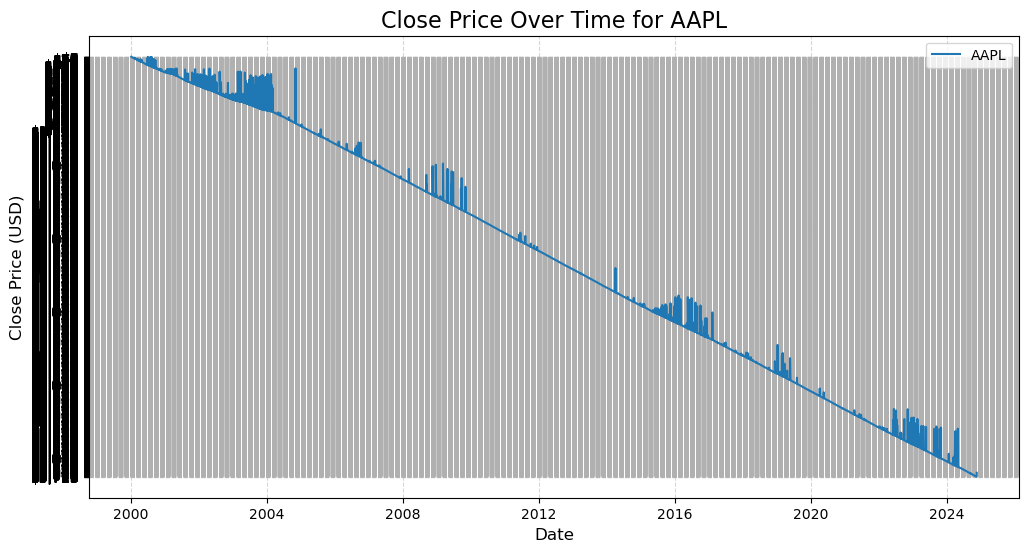

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Filter data for a specific ticker, e.g., 'AAPL'
ticker_to_plot = "AAPL"
df_ticker = df[df['Ticker'] == ticker_to_plot]

# Plot the Close price over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ticker, x='Date', y='Close', label=ticker_to_plot)

# Add titles and labels
plt.title(f"Close Price Over Time for {ticker_to_plot}", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price (USD)", fontsize=12)

# Format y-axis ticks for better readability
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

# Add a grid for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Show the legend
plt.legend()

# Display the plot
plt.show()


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf

# Set up plot styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price      Adj Close Close High  Low Open Volume company_name Adj Close Close  \
Ticker          AAPL  AAPL AAPL AAPL AAPL   AAPL                   GOOG  GOOG   
Date                                                                            
2024-11-07       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-08       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-11       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-12       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-13       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-14       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-15       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-18       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-19       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-20       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   

Price      High  ...       Low Open Volume   Adj Close       Close  \
Ticker     GOOG  ... MSFT MSFT MSFT   MSFT        AMZN        AMZN   
Date             ...                                                 
2024-11-07  NaN  ...  NaN  NaN  NaN    NaN  210.050003  210.050003   
2024-11-08  NaN  ...  NaN  NaN  NaN    NaN  208.179993  208.179993   
2024-11-11  NaN  ...  NaN  NaN  NaN    NaN  206.839996  206.839996   
2024-11-12  NaN  ...  NaN  NaN  NaN    NaN  208.910004  208.910004   
2024-11-13  NaN  ...  NaN  NaN  NaN    NaN  214.100006  214.100006   
2024-11-14  NaN  ...  NaN  NaN  NaN    NaN  211.479996  211.479996   
2024-11-15  NaN  ...  NaN  NaN  NaN    NaN  202.610001  202.610001   
2024-11-18  NaN  ...  NaN  NaN  NaN    NaN  201.699997  201.699997   
2024-11-19  NaN  ...  NaN  NaN  NaN    NaN  204.610001  204.610001   
2024-11-20  NaN  ...  NaN  NaN  NaN    NaN  202.880005  202.880005   

Price             High         Low        Open      Volume  
Ticker            AMZN        AMZN        AMZN        AMZN  
Date                                                        
2024-11-07  212.250000  207.190002  207.440002  52878400.0  
2024-11-08  209.960007  207.440002  209.720001  36075800.0  
2024-11-11  209.649994  205.589996  208.500000  35456000.0  
2024-11-12  209.539993  206.009995  208.369995  38942900.0  
2024-11-13  215.089996  209.139999  209.399994  46212900.0  
2024-11-14  215.899994  210.880005  214.160004  42620300.0  
2024-11-15  207.339996  199.610001  206.759995  86591100.0  
2024-11-18  204.669998  200.949997  204.149994  36512500.0  
2024-11-19  205.300003  198.779999  199.330002  31197900.0  
2024-11-20  203.130005  199.449997  202.979996  32700500.0  

[10 rows x 25 columns]

In [27]:


# Summary Stats
AAPL.describe()



Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,201.047070,201.583849,203.257381,199.716786,201.446150,5.744068e+07
std,21.932269,21.757408,21.948296,21.391162,21.709876,3.039849e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,2.404830e+07
25%,183.452488,184.224998,185.134995,182.204998,183.827499,4.211708e+07
50%,193.820480,194.589996,196.325005,193.610001,195.055000,5.013555e+07
75%,223.707142,224.192493,225.982498,222.000004,224.369995,6.372982e+07
max,236.220108,236.479996,237.490005,234.449997,236.479996,3.186799e+08


In [28]:


# General info
AAPL.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-11-21 to 2024-11-20
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  252 non-null    float64
 1   (Close, AAPL)      252 non-null    float64
 2   (High, AAPL)       252 non-null    float64
 3   (Low, AAPL)        252 non-null    float64
 4   (Open, AAPL)       252 non-null    float64
 5   (Volume, AAPL)     252 non-null    int64  
 6   (company_name, )   252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [29]:
AAPL

Price,Adj Close,Close,High,Low,Open,Volume,company_name
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2023-11-21,189.710587,190.639999,191.520004,189.740005,191.410004,38134500,APPLE
2023-11-22,190.377335,191.309998,192.929993,190.830002,191.490005,39617700,APPLE
2023-11-24,189.043854,189.970001,190.899994,189.250000,190.869995,24048300,APPLE
2023-11-27,188.864731,189.789993,190.669998,188.899994,189.919998,40552600,APPLE
2023-11-28,189.471756,190.399994,191.080002,189.399994,189.779999,38415400,APPLE
...,...,...,...,...,...,...,...
2024-11-14,228.220001,228.220001,228.869995,225.000000,225.020004,44923900,APPLE
2024-11-15,225.000000,225.000000,226.919998,224.270004,226.399994,47923700,APPLE


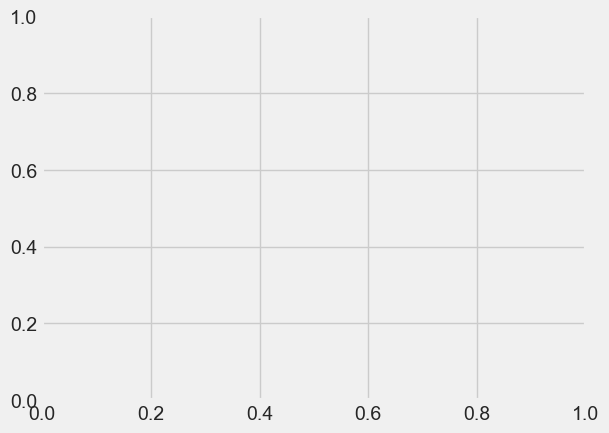

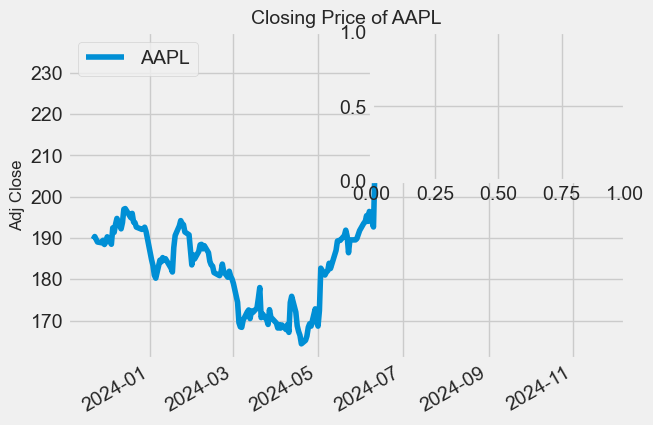

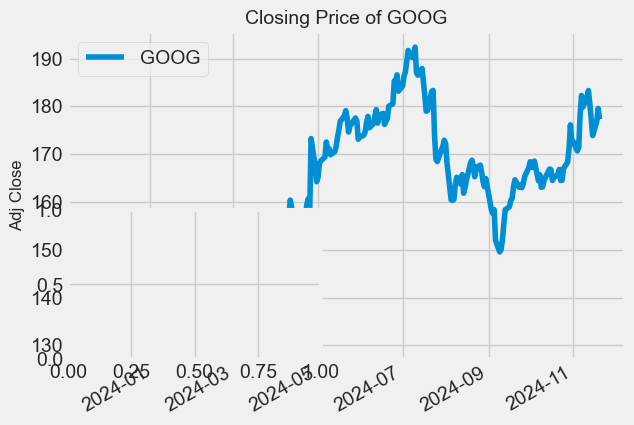

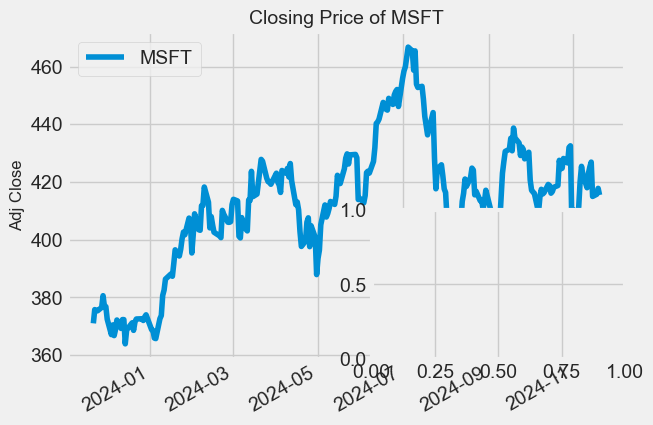

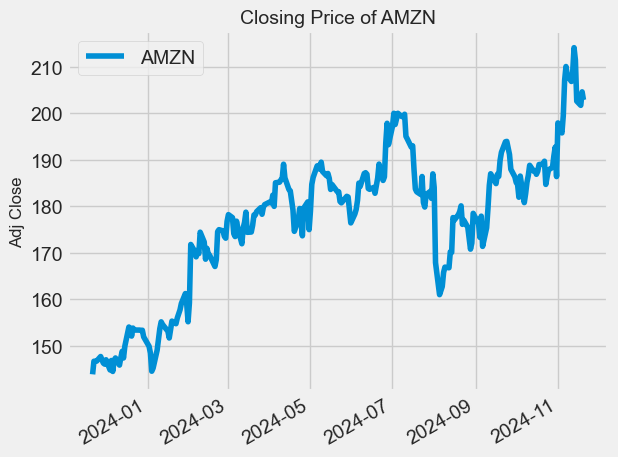

In [42]:

plt.figure(figsize=(15, 10))

# Adjust subplot spacing
plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.4, wspace=0.3)

# Plot for each company
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)  # Create a grid of 2x2 subplots
    company['Adj Close'].plot()
    plt.ylabel('Adj Close', fontsize=12)
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}", fontsize=14)

plt.tight_layout()  # Ensures everything fits within the figure
plt.show()




<Figure size 1500x800 with 0 Axes>

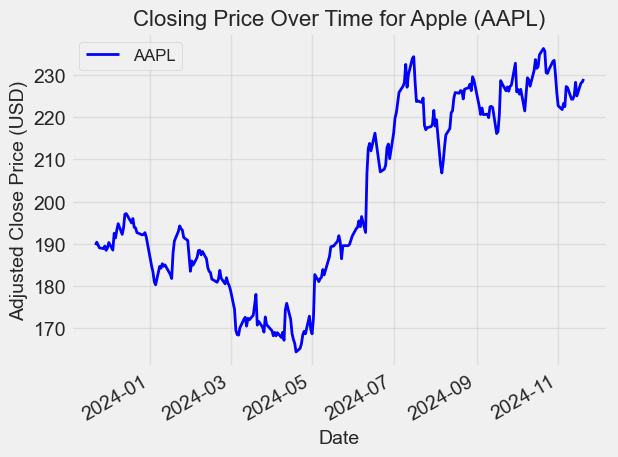

In [43]:
# Assuming 'apple_data' contains the data for AAPL
plt.figure(figsize=(15, 8))  # Set the figure size

# Plot 'Adj Close' for Apple
AAPL['Adj Close'].plot(label='AAPL', color='blue', linewidth=2)

# Add labels and title
plt.ylabel('Adjusted Close Price (USD)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Closing Price Over Time for Apple (AAPL)', fontsize=16)

# Add a legend
plt.legend(loc='upper left', fontsize=12)

# Show grid for better visualization
plt.grid(alpha=0.5)

plt.tight_layout()  # Adjust layout
plt.show()


In [47]:
AAPL.columns

MultiIndex([(   'Adj Close', 'AAPL'),
            (       'Close', 'AAPL'),
            (        'High', 'AAPL'),
            (         'Low', 'AAPL'),
            (        'Open', 'AAPL'),
            (      'Volume', 'AAPL'),
            ('company_name',     '')],
           names=['Price', 'Ticker'])

In [48]:
# Drop rows with NaN values from specific columns in the MultiIndex DataFrame
columns_to_check = [
    ('Adj Close', 'AAPL'),
    ('Close', 'AAPL'),
    ('High', 'AAPL'),
    ('Low', 'AAPL'),
    ('Open', 'AAPL'),
    ('Volume', 'AAPL')
]

# Remove rows where any of the specified columns have NaN values
AAPL_cleaned = AAPL.dropna(subset=columns_to_check)

# Display the cleaned DataFrame
print(AAPL_cleaned)


Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-11-21  189.710587  190.639999  191.520004  189.740005  191.410004   
2023-11-22  190.377335  191.309998  192.929993  190.830002  191.490005   
2023-11-24  189.043854  189.970001  190.899994  189.250000  190.869995   
2023-11-27  188.864731  189.789993  190.669998  188.899994  189.919998   
2023-11-28  189.471756  190.399994  191.080002  189.399994  189.779999   
...                ...         ...         ...         ...         ...   
2024-11-14  228.220001  228.220001  228.869995  225.000000  225.020004   
2024-11-15  225.000000  225.000000  226.919998  224.270004  226.399994   
2024-11-18  228.020004  228.020004  229.740005  225.169998  225.250000   
2024-11-19  228.279999  228.279999  230.160004  226.660004  226.979996   
2024-11-20  229.000000  229.000000  22

In [49]:
print(AAPL.isnull().sum())

Price         Ticker
Adj Close     AAPL      0
Close         AAPL      0
High          AAPL      0
Low           AAPL      0
Open          AAPL      0
Volume        AAPL      0
company_name            0
dtype: int64


<Figure size 1500x800 with 0 Axes>

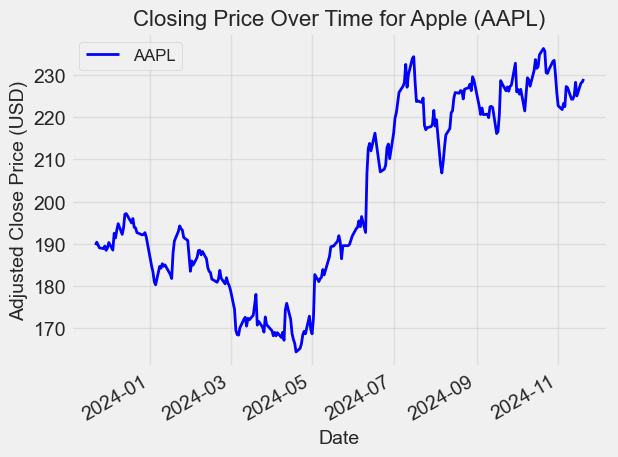

In [50]:
# Assuming 'apple_data' contains the data for AAPL
plt.figure(figsize=(15, 8))  # Set the figure size

# Plot 'Adj Close' for Apple
AAPL['Adj Close'].plot(label='AAPL', color='blue', linewidth=2)

# Add labels and title
plt.ylabel('Adjusted Close Price (USD)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Closing Price Over Time for Apple (AAPL)', fontsize=16)

# Add a legend
plt.legend(loc='upper left', fontsize=12)

# Show grid for better visualization
plt.grid(alpha=0.5)

plt.tight_layout()  # Adjust layout
plt.show()


In [52]:
!pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 818.6 kB/s eta 0:00:00
  Using cached ten

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Filter only 'Adj Close' for AAPL
data = AAPL['Adj Close', 'AAPL'].dropna()  # Remove NaN values
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
# Prepare data for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 60  # Use 60 days of historical data to predict the next day
X, y = create_dataset(scaled_data, time_step)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

C:\Users\PMLS\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.2936
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0334
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0330
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0244
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0273
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0119
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0159
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0125
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0110
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0101


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 397ms/step


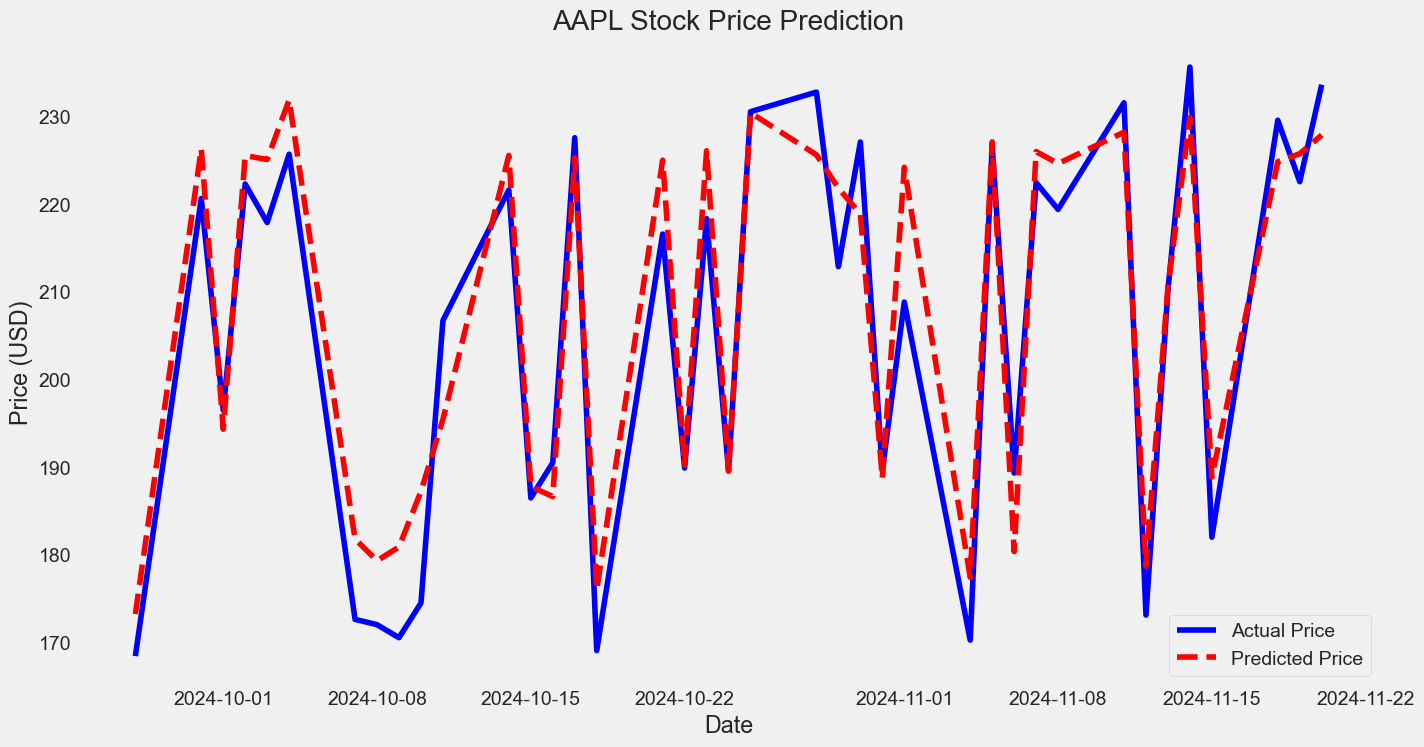

Future trend (Up/Down):
['Up' 'Down' 'Up' 'Down' 'Up' 'Down' 'Down' 'Up' 'Up' 'Up' 'Up' 'Down'
 'Down' 'Up' 'Down' 'Up' 'Down' 'Up' 'Down' 'Up' 'Down' 'Down' 'Down'
 'Down' 'Up' 'Down' 'Up' 'Down' 'Up' 'Down' 'Up' 'Down' 'Up' 'Up' 'Down'
 'Up' 'Up' 'Up']


In [54]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Determine future up or down trend
future_trend = np.where(np.diff(y_pred.flatten()) > 0, 'Up', 'Down')

# Plot actual vs predicted prices
plt.figure(figsize=(15, 8))
plt.plot(data.index[-len(y_test):], y_test.flatten(), label='Actual Price', color='blue')
plt.plot(data.index[-len(y_test):], y_pred.flatten(), label='Predicted Price', color='red', linestyle='dashed')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Show trend visualization
print("Future trend (Up/Down):")
print(future_trend)